# Ford GoBike System Data Exploration
## by Alexander Kaufmann

## Preliminary Wrangling

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [70]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [94]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [91]:
# shape and composition of dataset
print(df.shape)
print(df.info())

(183412, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  use

In [95]:
# change user_type and member_gender to categorical datatype, change start_time and end_time to datetime datatypes
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

# change member_birth_year to age for easier analysis
# will assume current year to be 2010 (this makes the youngest person 9 years old, which is realistic)
df['age'] = 2010 - df['member_birth_year']

In [99]:
# descriptive statistics for dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,25.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,9.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,18.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,23.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,30.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,132.000000


In [100]:
print(df.user_type.value_counts())
print(df.member_gender.value_counts())

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64
Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64


### What is the structure of your dataset?
There are 183412 rides in the dataset, each ride with 16 features. The features I am most interested in are mostly numeric and categorical, such as user_type, member_gender, and duration_sec.

The categorical data user_type includes subsriber and customer. The member_gender feature includes male, female, and other.

### What is/are the main feature(s) of interest in your dataset?

I am mostly interested in how certain features affect the duration of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I will be looking at how duration changes in relation to user_type, member_gender, and age.

## Univariate Exploration

What is the distribution of duration?

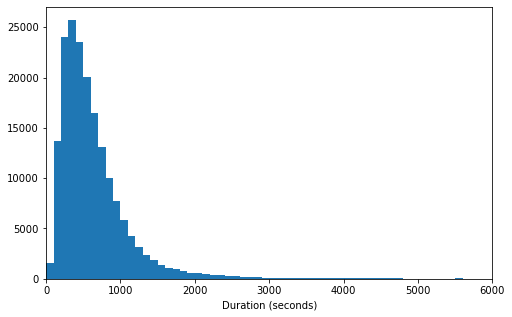

In [101]:
# histogram showing 
binsize=100
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=df, x='duration_sec',bins=bins);
plt.xlim(0, 6000);
plt.xlabel('Duration (seconds)');

Since this graph has a long tailed distribution, I will graph it using a log scale.

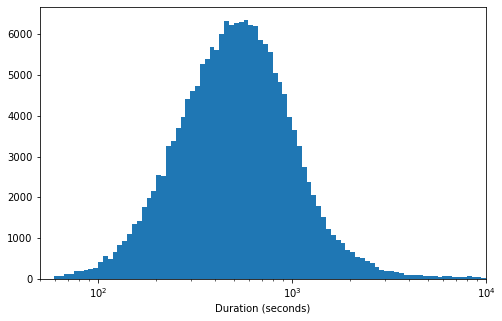

In [102]:
# put data on a log scale because of long tail distribution
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df.duration_sec.max())+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log');
plt.xticks([100, 1e3, 1e4, 1e5]);
plt.xlim(50, 1e4);
plt.xlabel('Duration (seconds)');

Duration has a long tailed distribution. The most durations are less than 10000 seconds. When plotting that data using a log scale, there is a normal distribution. There is a peak in duration a little under the 1k marker.

How many riders are customers vs subscribers and how many are female, male, or other?

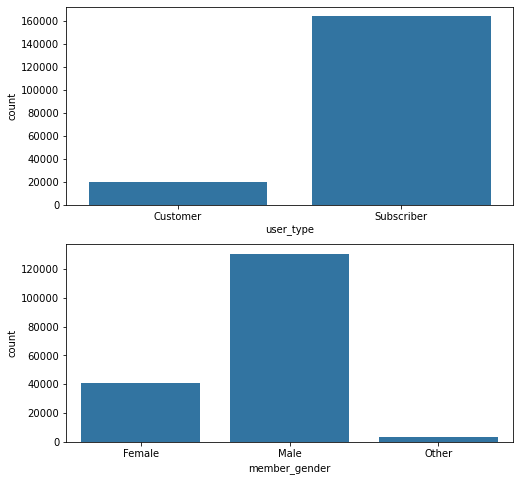

In [103]:
# since user_type and member_gender are categorical variables, a bar chart is appropriate
base_color = sb.color_palette()[0]

fig, ax = plt.subplots(nrows=2, figsize=[8,8]);
sb.countplot(data=df, x='user_type', color=base_color, ax=ax[0]);
sb.countplot(data=df, x='member_gender', color=base_color, ax=ax[1]);

It is clear that most of the rides were completed by subscribers as opposed to customers. There is approximately a 140,000 difference in these user types.
Additionally, it is clear that the majority of riders are male. There are less than half as many female riders as male riders and an extremely minimal amount of 'other' genders.

What is the distribution of the age feature?

(6.0, 100.0)

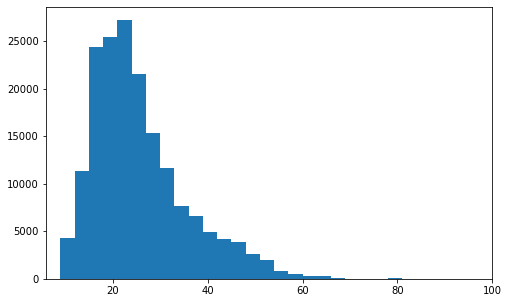

In [105]:
binsize = 3
bins = np.arange(0, df.age.max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=df, x='age', bins=bins);
plt.xlim([6,100])

The data has a long tailed distribution. The most common age range is between 20 and 35, with a sharp decline after 35. There is a decrease in frequency as the age increases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable had a significant range of values, as it had a long tailed distribution. Thus, I plotted the data using a log transformation. Using the log scale, the data looked normally distributed, with a peak around 800.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were no unusual distributions when investigating the other features. Thus, no operations were necessary. Based on the exploration, I could see that most of the user types were subscriber and that the most common gender was male. There were a little less than half the amount of females as males. There was a very small amount of 'other' genders. In terms of the age, most riders were between 20 and 35 years old, with the frequency decreasing as age increased after 35.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Firstly, I want to see the relationship between duration and age.

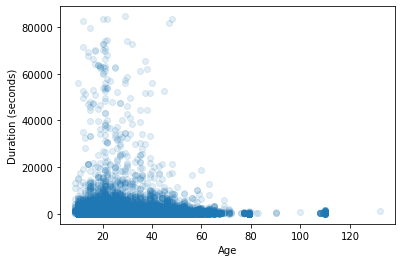

In [106]:
# a scatter plot depicting age vs duration
plt.scatter(data=df, x='age', y='duration_sec', alpha=1/8);
plt.xlabel('Age');
plt.ylabel('Duration (seconds)');

The runs with the longest durations were completed by riders between the ages of 10 and 55. As age increased, the durations decreased. It is hard to see a more precise distribution of the dense part of the scatter plot, thus I will use a heat map next to zoom in on the distribution within a 10000 duration.

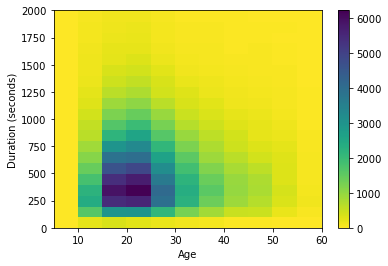

In [122]:
# a heat map depicting age vs duration
bins_x = np.arange(0, 95+5, 5)
bins_y = np.arange(0, df.duration_sec.max()+100, 100)
plt.hist2d(data=df, x='age', y='duration_sec', cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar();
plt.xlabel('Age');
plt.ylabel('Duration (seconds)');
plt.ylim([0,2000]);
plt.xlim([5,60]);

The majority of rides were completed by riders within the ages 10 and 35 and they had a duration of 1000 or less. Outside of these age and duration ranges, the frequency decreases drastically.

Next, I will investigate the relationship between ride duration and the two categorical variables: user_type and member_gender.

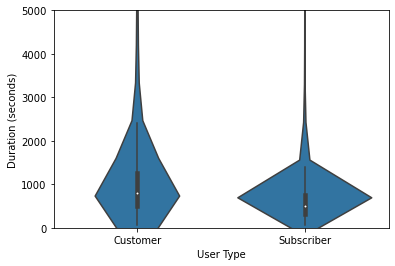

In [142]:
# since duration is quantitative and user_type is categorical, a violin plot is appropriate
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y='duration_sec', color=base_color);
plt.ylim([0,5000]);
plt.xlabel('User Type');
plt.ylabel('Duration (seconds)');

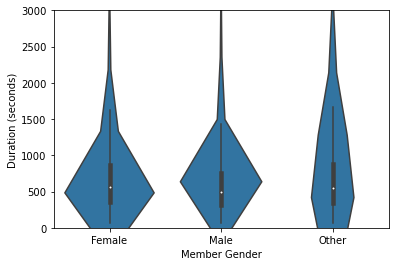

In [143]:
# since duration is quantitative and member_gender is categorical, a violin plot is appropriate
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='member_gender', y='duration_sec', color=base_color);
plt.ylim([0,3000]);
plt.xlabel('Member Gender');
plt.ylabel('Duration (seconds)');

I will create bart plots to take a look at these relationships another way

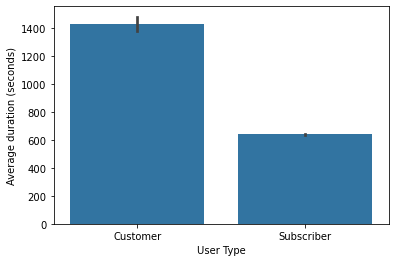

In [145]:
# bar plot to see average duration depending on user type
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='user_type', y='duration_sec', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Average duration (seconds)');

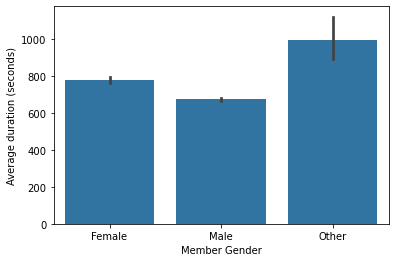

In [146]:
# bar plot to see average duration depending on member gender
base_color = sb.color_palette()[0]
sb.barplot(data=df, x='member_gender', y='duration_sec', color=base_color);
plt.xlabel('Member Gender');
plt.ylabel('Average duration (seconds)');

For user type, it is clear that on average, customers had rides with longer durations. There were more longer duration rides by customers than subscribers as well, as you can see by the larger pointer of the violin plot as it moves upward.

For member gender, it is clear that males, females, and 'other' gender riders had similar duration rides on average, with riders of 'other' gender having slightly higher duration rides on average. The bulk of the rides for male and female riders were between 0 and 1250 seconds. Riders of 'other' gender had their distribution of duration spread out more towards longer durations, as the distribution was concentrated more between 0 and 2000 seconds.

Next, I will investigate any relationships between gender and age and user type and age.

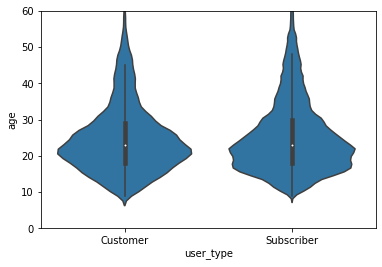

In [151]:
# violin plot to depict user type and age
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y='age', color=base_color);
plt.ylim([0,60]);

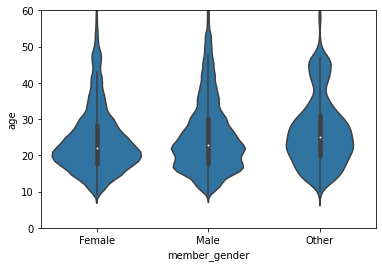

In [152]:
# violin plot to depict gender and age
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='member_gender', y='age', color=base_color);
plt.ylim([0,60]);

It looks like there were very similar age distributions regardless of user types, as the customer and subscriber violin plots look almost identical.

Although the violin plots among genders look similar as well, there is a dip in frequency for riders of 'other' gender around the age 40. Additionally, the average age of riders of 'other' genders was higher than that of male and female riders. Male riders on average were older than female riders by a very small amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For age, the majority of rides with very high durations were completed by riders between the ages of 10 and 45. As age increased, the number of high duration rides drastically decreased. Additionally, the majority of rides were completed by riders between the ages 10 and 30 with a duration of 1000 seconds or less.

Regardless of user types, the bulk of the ride durations were similar, as there was high concentration around the same areas in the violin charts. However, on average, customers had longer duration rides. Despite the duration concentration being similar, I believe this is the case due to more outliers in duration for customer riders.

When it comes to gender, the bulk of the ride durations were similar for male and female riders, as there was high concentration around the same areas in the violin charts. Riders of 'other' gender did not have as drastic of a concentration, as more of their rides had larger durations. This is clearly seen in the bar plots as well, as riders of 'other' gender had on average higher duration rides. Females had on average slightly higher duration rides than males.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It seems as though the distributions of ages are almost identical when it comes to user type.

Additionally, the distributions of ages depending on gender are also similar, however riders of 'other' gender tend to be slightly older than riders of male and female gender.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

I want to investigate the ages in higher duration rides depending on user type and gender

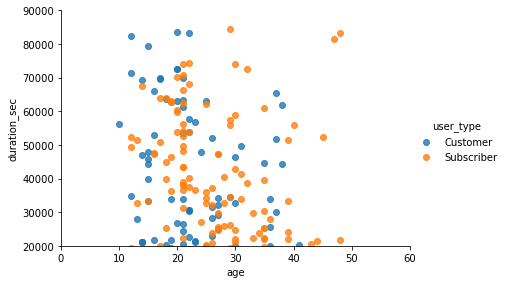

In [162]:
# scatter plot with age vs duration with color encoding for user type
desired_types = ['customer', 'subscriber']
g = sb.FacetGrid(data=df, hue='user_type', size=4, aspect=1.5);
g = g.map(sb.regplot, 'age', 'duration_sec', fit_reg=False);
g.set(xlim=(0,60), ylim=(20000, 90000));
g.add_legend();

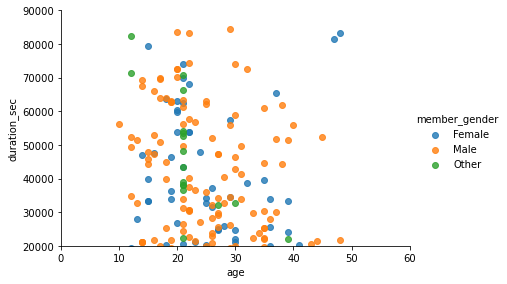

In [163]:
# scatter plot with age vs duration with color encoding for gender
desired_types = ['male', 'female', 'other']
g = sb.FacetGrid(data=df, hue='member_gender', size=4, aspect=1.5);
g = g.map(sb.regplot, 'age', 'duration_sec', fit_reg=False);
g.set(xlim=(0,60), ylim=(20000, 90000));
g.add_legend();

For ride durations higher than 20000 seconds, most of the riders are male within the ages 10 to 40. There are about half as many female riders in this duration range, and their ages are distributed rather evenly between 10 and 40 as well. There as the fewest riders of 'other' gender in this duration range, and the ones that are in the range are around age 20.

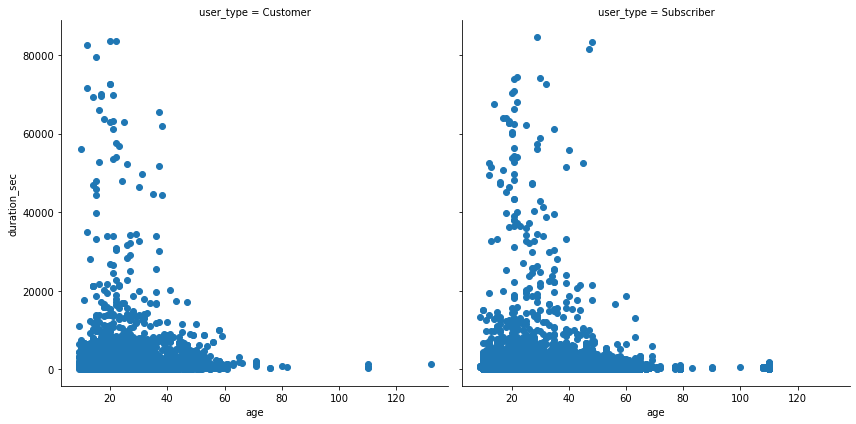

In [166]:
g = sb.FacetGrid(data=df, col='user_type', size=6, margin_titles=True);
g.map(plt.scatter, 'age', 'duration_sec');

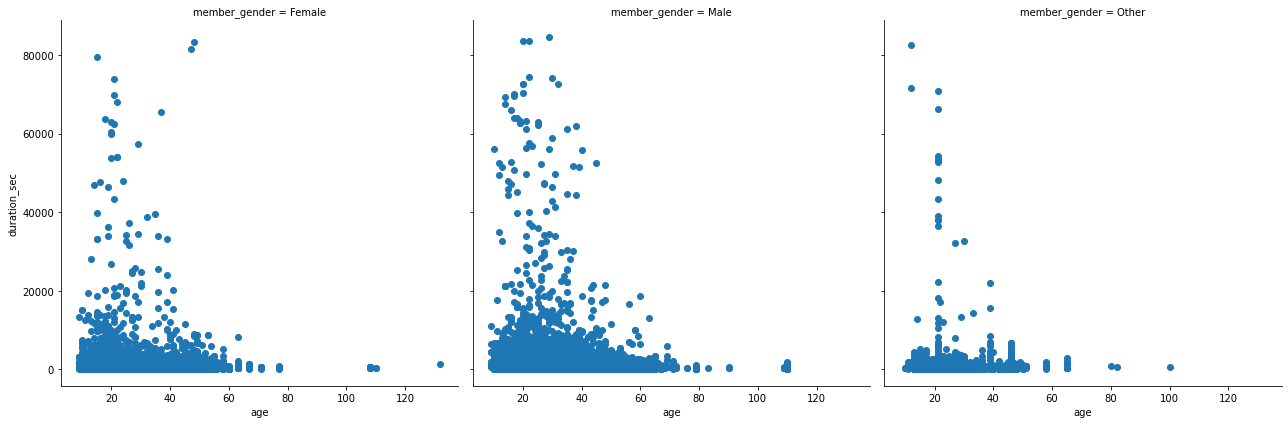

In [167]:
g = sb.FacetGrid(data=df, col='member_gender', size=6, margin_titles=True);
g.map(plt.scatter, 'age', 'duration_sec');

The distributions for age vs duration are almost identical for riders who are subscribers and customers.

The distributions for age vs duration are very similar for female and male riders. For riders of 'other' gender, there were fewer higher duration rides, and the rides that were higher duration were done by riders around the age of 20.

In this section, I wanted to look at the distributions of age vs duration for higher rides of higher durations. Encoded the scatter plot to also see a distinction between user types and member genders as well. There was a very similar distribution for subscribers and customers. Also, the oldest riders with rides in this high duration range were subscribers. When looking at how gender affected these distributions, I found that most riders in this high duration range were males, and there were about half as many riders in this range who were female. The gender with the lowest amount of riders in this range was 'other'. Also, there were some older riders around the age of 50 who made it in this range, and they were made up of an even amount of both male and female riders. The highest duration rides completed by riders around the age of 50 were completed by females.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!